# 📊Sales & Profitability Analysis Using Python

## objective

Analyze sales performance, profitability drivers, discount impact, and regional trends to identify business improvement opportunities.

## 1. Data Understanding & Cleaning

In [138]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Import & Dataset Loading

In [139]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

df = pd.read_csv(
    r"C:\Users\user\.cache\kagglehub\datasets\vivek468\superstore-dataset-final\versions\1\Sample - Superstore.csv",
    encoding="latin1"
)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\vivek468\superstore-dataset-final\versions\1


## Exploratory Data Analysis (EDA)

In this section, we examine the dataset structure, dimensions, data types, summary statistics, missing values, and duplicate records.

### Dataset Overview

In [140]:
df.head()
df.shape

(9994, 21)

###  Data Types & Columns

In [141]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

###  Summary Statistics & Data Quality Check

In [142]:
df.describe()
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

##  Date Conversion and Feature Engineering

We convert Order Date and Ship Date into datetime format and extract useful time-based features such as Year, Month, Month Name, and Quarter for time-series analysis.


In [143]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [144]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.quarter

## Overall Business Performance

In [145]:
df['Sales'].sum()
df['Profit'].sum()

np.float64(286397.0217)

- Total Sales: 2.29M  
- Total Profit: 286K  
- Overall business is profitable.


## Sales Performance by Region

In [146]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

- West region generates the highest sales.
- South region has the lowest sales.


##  Sales by Category

In [147]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

- Technology contributes highest sales.
- Furniture contributes lowest.


## Monthly Sales Trend Analysis

In [151]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales.sort_values(['Year', 'Month'], inplace=True)
monthly_sales

,Year,Month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


In [156]:
monthly_sales['Date'] = pd.to_datetime(
    monthly_sales['Year'].astype(str) + '-' +
    monthly_sales['Month'].astype(str)
)
monthly_sales.sort_values('Date', inplace=True)

In [157]:
monthly_profit = df.groupby(['Year','Month'])['Profit'].sum().reset_index()

monthly_profit['Date'] = pd.to_datetime(
    monthly_profit['Year'].astype(str) + '-' +
    monthly_profit['Month'].astype(str)
)

monthly_profit.sort_values('Date', inplace=True)


In [154]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Month_Name', 'Quarter'],
      dtype='object')

## Visualization

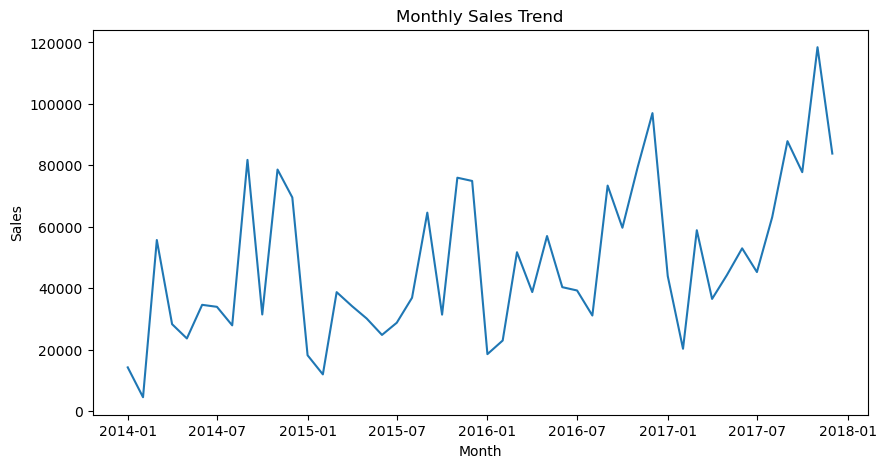

In [158]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# sales & profit by category

This section analyzes total sales and profit across product categories to identify the most profitable segment.

## Category Summary

In [ ]:
category_analysis = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_analysis['Profit_Margin_%'] = (category_analysis['Profit'] / category_analysis['Sales']) * 100
category_analysis.sort_values('Sales', ascending=False)

### Average Discount by Category

In [ ]:
df.groupby('Category')[['Sales', 'Profit', 'Discount']].mean()

### Correlation Between Discount & Profit

In [ ]:
df[['Discount', 'Profit']].corr()

### Average Profit Margin by Category

In [ ]:
df['Profit_Margin'] = df['Profit'] / df['Sales'] * 100

df.groupby('Category')['Profit_Margin'].mean().sort_values(ascending=False)


## Business Insights

### Key Insights

- Technology is the most profitable category.
- Furniture has the lowest profit margin.
- Higher discounts tend to reduce profitability.
- Optimizing discount strategy can improve margins.


# Top 10 Products by Profit
This section identifies the highest profit-generating products.

In [162]:
df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64

### Insight

- Office equipment and technology products dominate profitability.
- High-ticket items contribute significantly to total profit.


# Products Generating Loss

This section identifies products contributing negatively to overall profit.


In [ ]:
df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

### Insight

- Large furniture items show consistent losses.
- High discounting is a major reason for negative profit.


# Regional Performance Analysis

This section evaluates sales and profitability across regions.


In [ ]:
region_analysis = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_analysis['Profit_Margin_%'] = (region_analysis['Profit'] / region_analysis['Sales']) * 100
region_analysis


### Insight

- West region generates the highest sales.
- Central region shows relatively lower profitability.
- Regional discount strategies impact margin performance.


In [ ]:
loss_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10).index
df[df['Product Name'].isin(loss_products)][['Product Name', 'Discount', 'Profit']].groupby('Product Name').mean()


### Overall Correlation

In [163]:
df[['Discount', 'Profit']].corr()


,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


### Category-wise Correlation

In [164]:
df.groupby('Category')[['Discount','Profit']].corr()


Discount    Profit
Category                                    
Furniture       Discount  1.000000 -0.483769
                Profit   -0.483769  1.000000
Office Supplies Discount  1.000000 -0.208787
                Profit   -0.208787  1.000000
Technology      Discount  1.000000 -0.268853
                Profit   -0.268853  1.000000

### Visualization

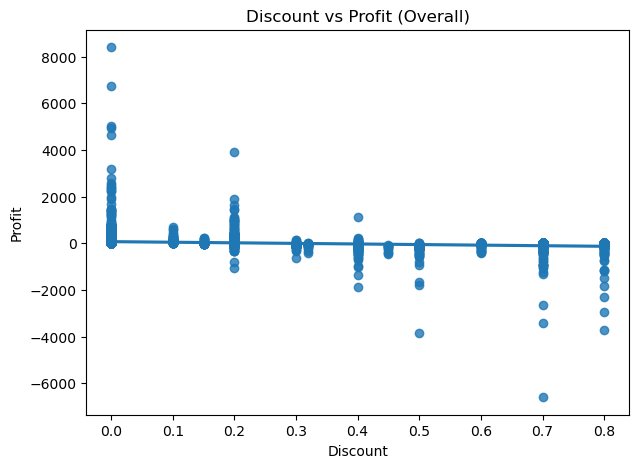

In [165]:
plt.figure(figsize=(7,5))
sns.regplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit (Overall)')
plt.show()


### Insight

- There is a negative relationship between discount and profit.
- Higher discount levels are associated with lower profitability.
- Furniture category is more sensitive to discounting.


# Sub-Category Performance Analysis

This section evaluates total sales and profit across sub-categories 
to identify high-performing and loss-making segments.


In [ ]:
subcat = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
subcat.sort_values('Profit', ascending=False)

## Profit Margin by Sub-Category

Profit margin is calculated as:

Profit Margin (%) = (Profit / Sales) × 100

This helps identify which sub-categories are generating 
healthy returns relative to their sales.


In [ ]:
subcat['Profit_Margin_%'] = (subcat['Profit'] / subcat['Sales']) * 100
subcat.sort_values('Profit_Margin_%', ascending=False)


## Discount Impact on Sub-Categories

This section analyzes the average discount and profit 
for each sub-category to understand how pricing strategy 
affects profitability.


In [ ]:
df.groupby('Sub-Category')[['Discount', 'Profit']].mean().sort_values('Discount', ascending=False)

# Category-Level Summary

This section aggregates total sales and profit at the 
category level to compare overall performance 
across Furniture, Office Supplies, and Technology.


In [ ]:
category_summary = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
category_summary['Profit_Margin_%'] = (category_summary['Profit'] / category_summary['Sales']) * 100
category_summary.sort_values('Profit', ascending=False)


## Profit Visualization

## Profit Comparison by Category

The bar chart below visualizes total profit 
generated by each category.


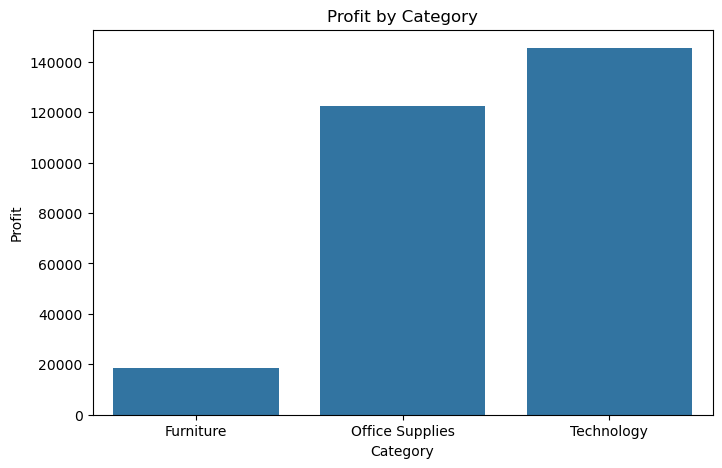

In [167]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=category_summary)
plt.title('Profit by Category')
plt.show()

### Key Insights

- Technology generates the highest overall profit.
- Office Supplies show stable profitability.
- Furniture has the lowest profit margin and is more sensitive to discounting.
- Excessive discounting negatively impacts profit.


### Average Discount by Category

This analysis shows the average discount offered in each category.  
It helps identify whether high discounts are impacting profitability.


In [ ]:
df.groupby('Category')['Discount'].mean()

### Discount vs Profit (Category-wise Visualization)

This visualization examines the relationship between discount and profit across categories.

Higher discounts generally lead to lower profit, especially in Furniture.


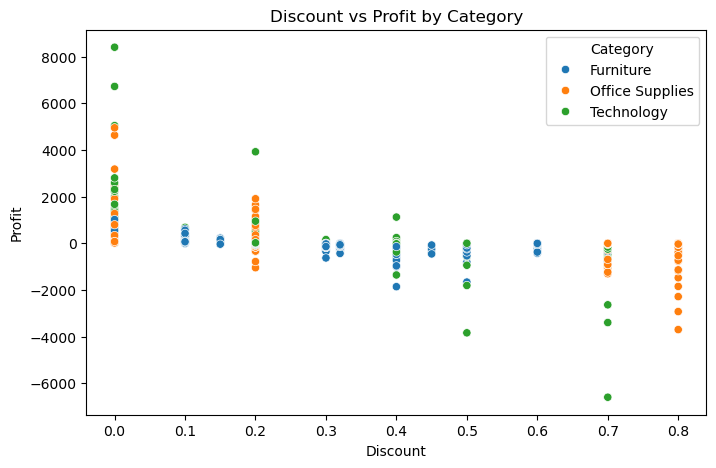

In [168]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df)
plt.title("Discount vs Profit by Category")
plt.show()


# Identifying Loss-Making Products (Furniture)

### Top Loss-Making Products in Furniture

This section identifies specific furniture products contributing the highest losses.

These products may require pricing revision or discount control.


In [169]:
furniture_loss = df[df['Category'] == 'Furniture']
furniture_loss.groupby('Product Name')['Profit'].sum().sort_values().head(5)

Product Name
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                       -2876.1156
Bush Advantage Collection Racetrack Conference Table                           -1934.3976
Balt Solid Wood Round Tables                                                   -1201.0581
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables              -1148.4375
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer   -1147.4000
Name: Profit, dtype: float64

## Discount Impact on Loss Products

### Discount Analysis for Loss Products

This analysis checks whether high discounts are responsible for negative profits in furniture products.


In [170]:
loss_products = furniture_loss.groupby('Product Name')['Profit'].sum().sort_values().head(5).index

df[df['Product Name'].isin(loss_products)][['Product Name','Discount','Profit']].groupby('Product Name').mean()


,Discount,Profit
Product Name,,
Balt Solid Wood Round Tables,0.200000,-300.264525
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,0.483333,-382.812500
Bush Advantage Collection Racetrack Conference Table,0.350000,-276.342514
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,0.280000,-575.223120
"Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer",0.300000,-229.480000


## Category-wise Correlation (Furniture & Technology)

### Correlation Between Discount and Profit (Furniture)

A strong negative correlation indicates that increasing discounts significantly reduces profit in Furniture.


In [ ]:
df[df['Category']=='Furniture'][['Discount','Profit']].corr()


### Correlation Between Discount and Profit (Technology)

Technology shows weaker negative correlation, indicating better price control and healthier margins.


In [ ]:
df[df['Category']=='Technology'][['Discount','Profit']].corr()


## Region & Category profit Analysis

### Region-wise Profit by Category

This section analyzes which region and category combinations generate the highest and lowest profits.


In [ ]:
df.groupby(['Region', 'Category'])['Profit'].sum().reset_index()

## Deep Dive: Central Region + Furniture

### Central Region - Furniture Performance

This deep dive examines why Furniture performs poorly in the Central region.

High average discount combined with strong negative correlation explains losses.


In [ ]:
df[(df['Region']=='Central') & (df['Category']=='Furniture')]\
[['Discount','Profit']].corr()


## Sub-Category Level Investigation

### Sub-Category Loss Analysis (Central - Furniture)

This analysis identifies which furniture sub-categories are responsible for regional losses.


In [ ]:
df[(df['Region']=='Central') & (df['Category']=='Furniture')]\
.groupby('Sub-Category')['Profit'].sum().sort_values()


## Final Business Insights

- Technology is the most profitable category with strong margins.
- Furniture shows high discount sensitivity and lower margins.
- Central region furniture segment contributes to losses.
- High discounts are strongly negatively correlated with profit.
- Loss-making products require pricing or discount strategy revision.

## Conclusion

This analysis demonstrates how pricing strategy and discount control directly impact profitability.
Data-driven insights can help improve margins and reduce losses across regions and categories.
